In [1071]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

BASE_DIR = os.getcwd()

# Importing all datasets
df = pd.read_csv(os.path.join(BASE_DIR,"..","Combined_BioFood_fdc.csv"))
df.head()

,Food Product,Moisture,Protein,Fat,Total Carbohydrates,Sugars,Dietary Fiber,Crude Fiber,Ash,Side Stream
0,"Sorghum, whole grain, white, raw",9.40,9.330000,NaN,58.700000,NaN,17.214000,NaN,1.440000,NaN
1,"Sorghum, whole grain, red, raw",10.10,6.650000,NaN,64.180000,NaN,14.024400,NaN,1.520000,NaN
2,"Quinoa, Blanca de juli, raw",11.39,12.369956,NaN,66.590415,NaN,12.157292,1.772200,2.995018,NaN
3,"Quinoa, Kcancolla, raw",10.78,13.534674,NaN,64.657734,NaN,12.588942,2.739054,3.140544,NaN
4,"Quinoa, La Molina 89, raw",12.03,13.608959,NaN,60.558548,NaN,14.066403,2.973386,4.803162,NaN


In [1072]:
df.drop(columns=['Side Stream'], inplace=True)
df.describe()

,Moisture,Protein,Fat,Total Carbohydrates,Sugars,Dietary Fiber,Crude Fiber,Ash
count,917.000000,999.000000,867.000000,695.000000,258.000000,295.000000,469.000000,984.000000
mean,50.544559,11.084471,3.700521,25.590529,12.857790,9.131421,4.893295,2.308466
std,36.166838,11.014271,9.894242,22.325043,15.093908,8.833709,4.680354,3.532600
min,0.420000,0.085938,0.000000,0.180000,0.340000,0.200000,0.100000,0.086500
25%,10.300000,1.143333,0.300000,7.750000,4.031977,2.400000,1.800000,0.829800
50%,67.710000,4.800000,1.000000,15.400000,6.952300,5.401000,3.720000,1.800000
75%,85.140000,21.090800,2.172906,47.799950,13.317438,13.152265,6.000000,3.417300
max,96.100000,51.100000,73.280000,87.312975,67.970000,42.980300,41.800000,99.000000


In [1073]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Food Product         1032 non-null   object 
 1   Moisture             917 non-null    float64
 2   Protein              999 non-null    float64
 3   Fat                  867 non-null    float64
 4   Total Carbohydrates  695 non-null    float64
 5   Sugars               258 non-null    float64
 6   Dietary Fiber        295 non-null    float64
 7   Crude Fiber          469 non-null    float64
 8   Ash                  984 non-null    float64
dtypes: float64(8), object(1)
memory usage: 72.7+ KB


In [1074]:
duplicate_counts = len(df) - len(df.drop_duplicates())
duplicate_counts

0

In [1075]:
round(df.isnull().sum().sort_values(ascending=False)/len(df), 2)

Sugars                 0.75
Dietary Fiber          0.71
Crude Fiber            0.55
Total Carbohydrates    0.33
Fat                    0.16
Moisture               0.11
Ash                    0.05
Protein                0.03
Food Product           0.00
dtype: float64

In [1076]:

def plotter(df, cols):
    for col in cols:
        fig, axes = plt.subplots(1, 2, figsize=(10, 3))
        fig.suptitle(f'Distribution of {col}', fontsize=14)

        # Boxplot
        sns.boxplot(y=df[col], ax=axes[0])
        axes[0].set_title('Boxplot')
        axes[0].set_ylim(top=100)

        # Histogram
        sns.histplot(df[col], bins=20, kde=True, ax=axes[1])
        axes[1].set_title('Histogram')

        plt.tight_layout()
        plt.show()


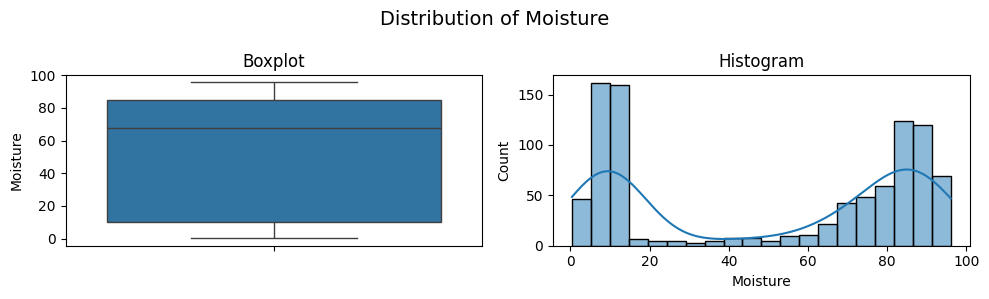

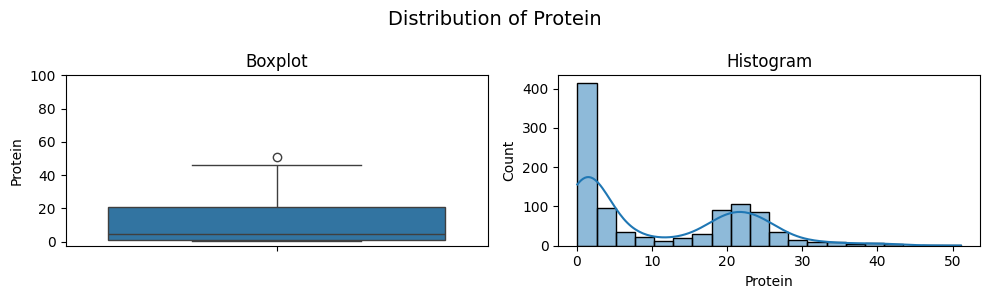

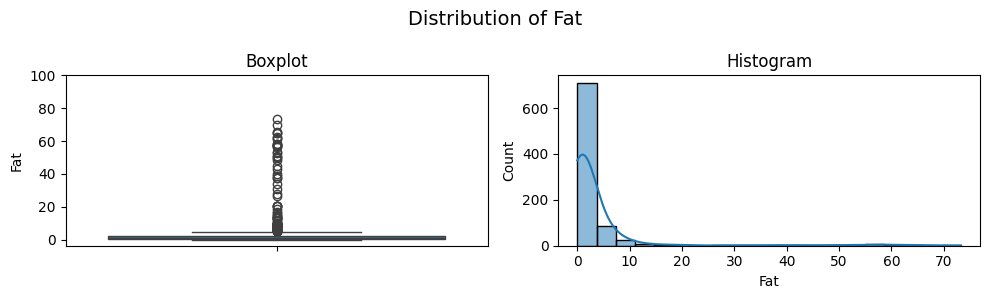

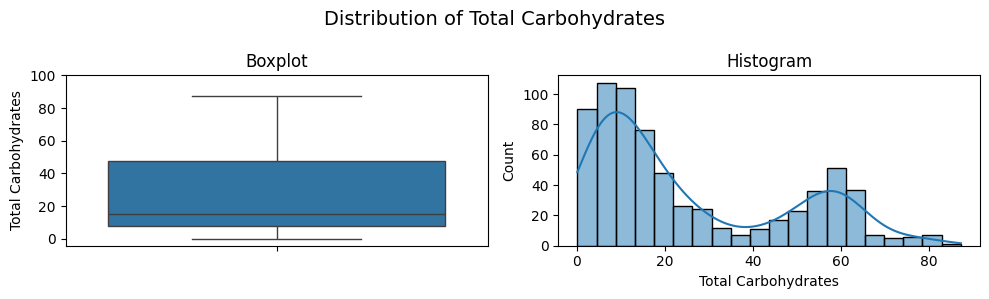

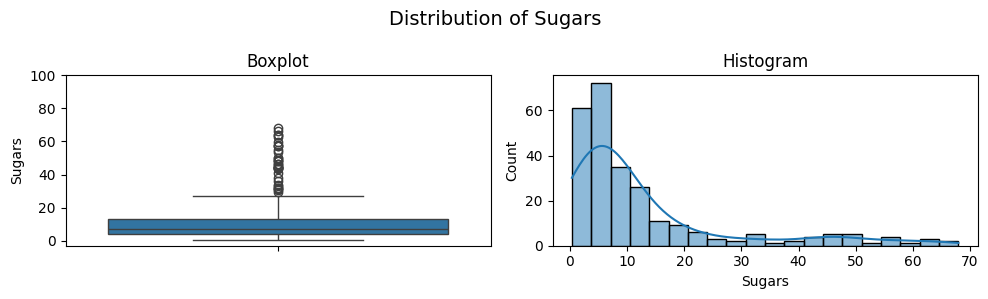

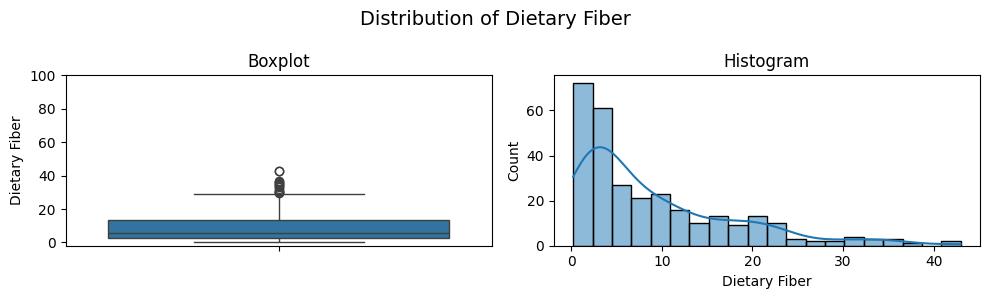

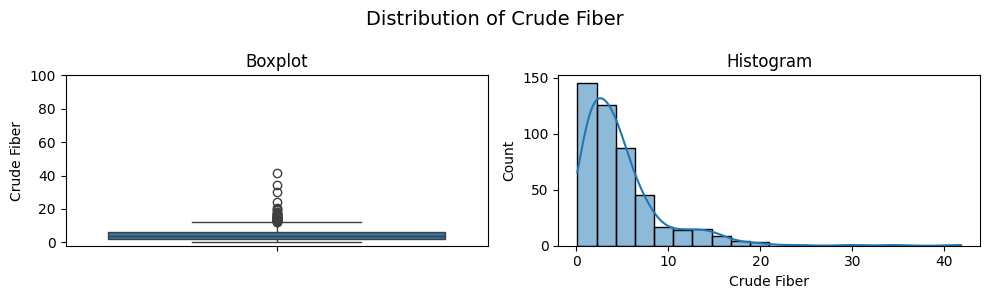

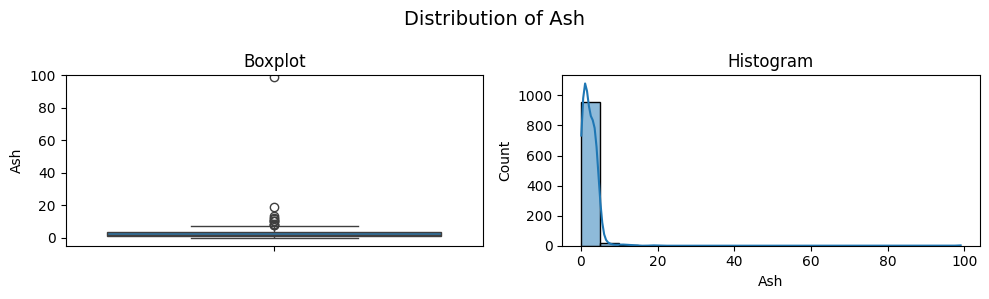

In [1077]:
numeric_cols = df.select_dtypes(exclude='object').columns
plotter(df, numeric_cols)

In [1078]:
# Cleaning the outliers from the dataset by a 3standard deviation rule

def clean_outliers(X, numeric_cols):
    for col in numeric_cols:
        col_mean = X[col].mean()
        col_std = X[col].std()
        z = (X[col] - col_mean) / col_std

        # Set outliers to NaN
        X.loc[np.abs(z) > 3, col] = np.nan
    return X

In [1079]:
len(numeric_cols)

8

In [1080]:
df_clean = df.copy()
df_cleaned=clean_outliers(df_clean, numeric_cols)

In [1081]:
df_cleaned.shape

(1032, 9)

In [1082]:
# Keep rows with at least 60% non-missing values
def remove_rows_with_nans(X, thresh, numeric_cols):
    threshold = len(numeric_cols) * thresh
    vals = X[numeric_cols].notna().sum(axis=1) >= threshold
    print(X[vals].shape, threshold, len(numeric_cols))
    return X[vals]

In [1083]:
df_cleaned = remove_rows_with_nans(df_cleaned, 0.6, numeric_cols)
df_cleaned.shape

(868, 9) 4.8 8


(868, 9)

In [1084]:
round(df_cleaned.isnull().sum().sort_values(ascending=False)/len(df_cleaned), 2)

Sugars                 0.75
Dietary Fiber          0.70
Crude Fiber            0.52
Total Carbohydrates    0.26
Fat                    0.15
Moisture               0.05
Ash                    0.00
Protein                0.00
Food Product           0.00
dtype: float64

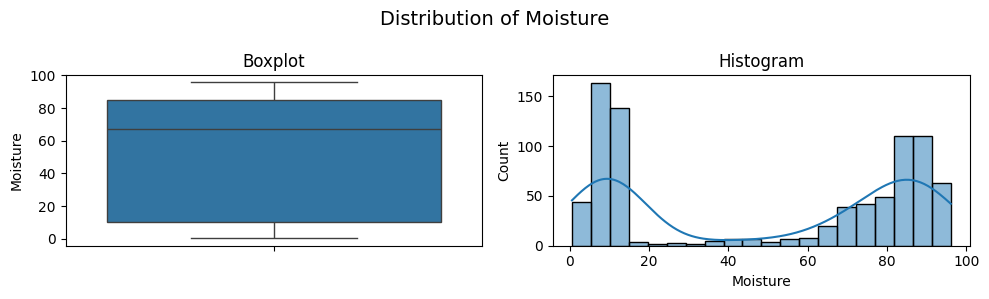

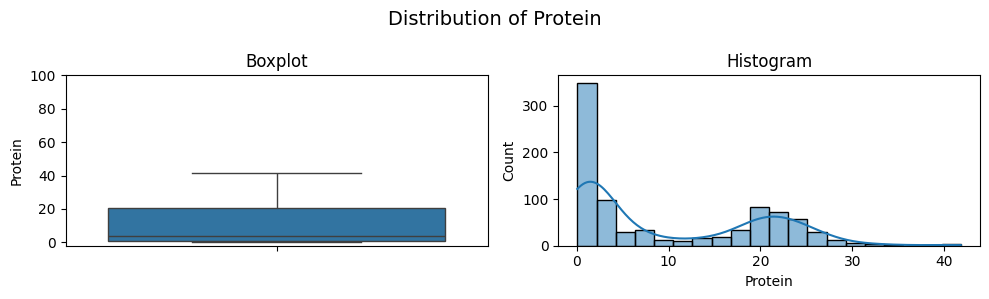

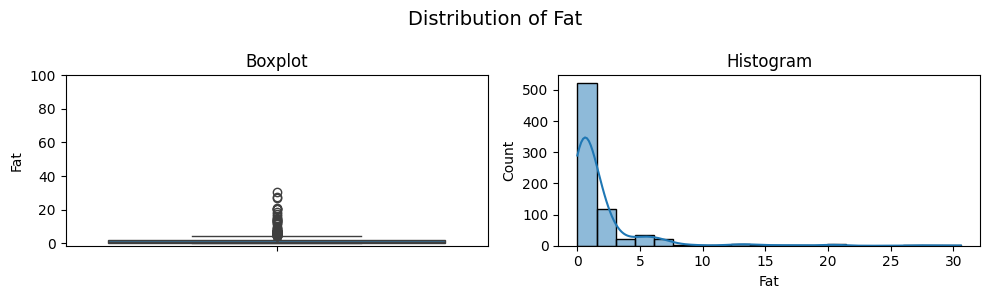

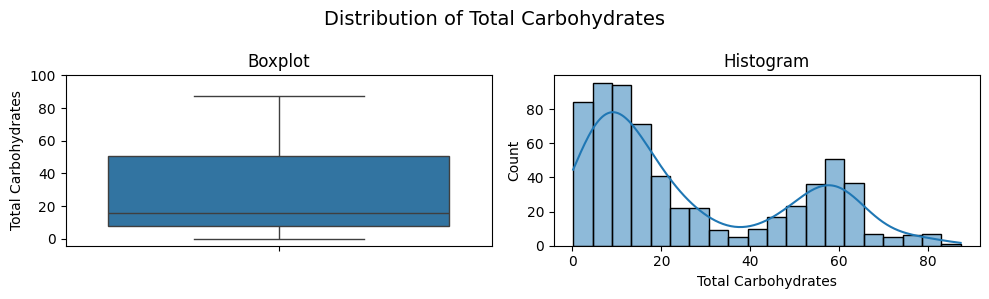

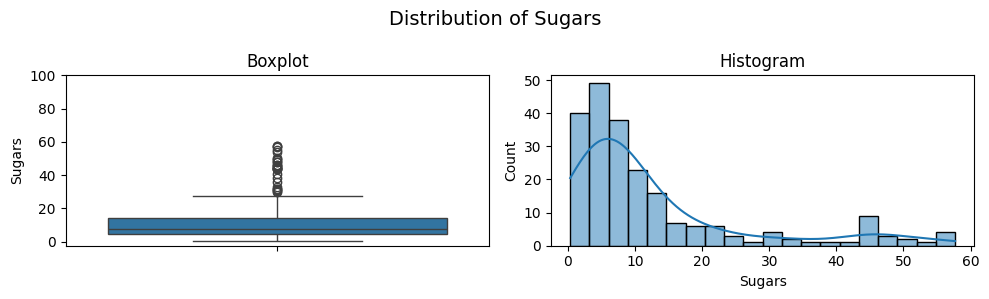

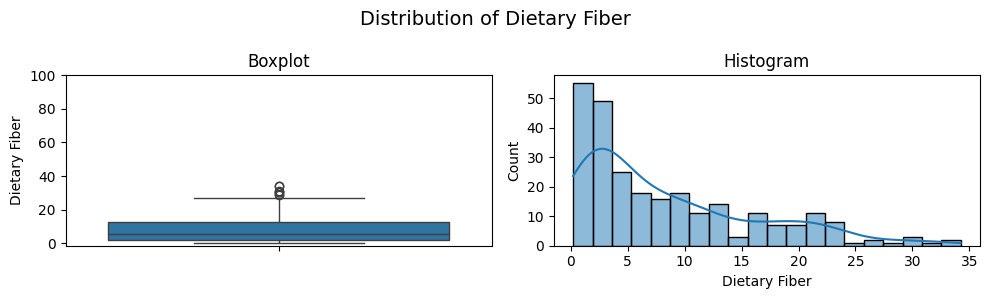

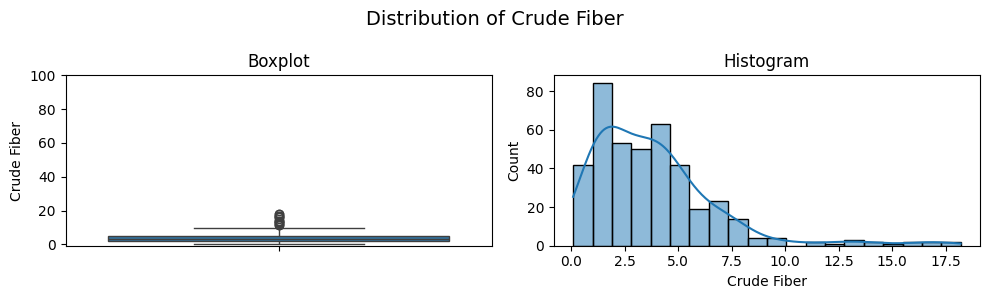

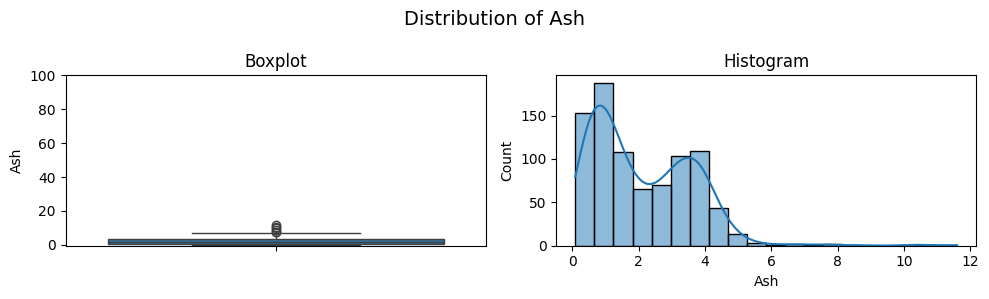

In [1085]:
plotter(df_cleaned, numeric_cols)

In [1086]:
def generate_synthetic_frap(df):
    df_mod = df[['Dietary Fiber', 'Protein', 'Ash', 'Sugars', 'Total Carbohydrates']].fillna(0)

    base_frap = (0.5 * df_mod['Dietary Fiber'] +
                 0.3 * df_mod['Protein'] +
                 0.2 * df_mod['Ash'] -
                 0.1 * df_mod['Sugars']) / (df_mod['Total Carbohydrates'] + 1) * 10

    noise = np.random.normal(0, 2, size=len(df_mod))

    synthetic_frap = np.abs(base_frap + noise)
    return synthetic_frap

df_cleaned['FRAP_synthetic'] = generate_synthetic_frap(df_cleaned)

/tmp/ipykernel_4871/3257125094.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['FRAP_synthetic'] = generate_synthetic_frap(df_cleaned)


In [1087]:
df_cleaned.shape

(868, 10)

In [1088]:
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_knn_imputer(df, numeric_cols, k_list=list(range(1, 20)), mask_frac=0.2, random_state=17):
    results = {}
    np.random.seed(random_state)

    # Use only numeric columns, and get rows with *some* observed data
    X_full = df[numeric_cols].copy()

    # Only use rows with enough observed values (e.g., at least 80% not NaN)
    min_non_nan = int(len(numeric_cols) * 0.8)
    X_eval = X_full.dropna(thresh=min_non_nan)

    if X_eval.empty:
        raise ValueError("No rows with sufficient data to evaluate.")

    for k in k_list:
        X_missing = X_eval.copy()
        # Create a mask for the non-NaN values
        valid_mask = ~X_eval.isna()
        random_mask = (np.random.rand(*X_eval.shape) < mask_frac) & valid_mask
        X_missing[random_mask] = np.nan

        # Impute
        imputer = KNNImputer(n_neighbors=k)
        X_imputed = imputer.fit_transform(X_missing)

        # Compare only on positions we masked
        true_vals = X_eval.values[random_mask]
        pred_vals = X_imputed[random_mask]

        mae = mean_absolute_error(true_vals, pred_vals)
        rmse = np.sqrt(mean_squared_error(true_vals, pred_vals))

        results[k] = {'MAE': mae, 'RMSE': rmse}

    return pd.DataFrame(results).T


In [1089]:
X= df_cleaned.drop(columns='FRAP_synthetic')
y = df_cleaned['FRAP_synthetic']
results_df = evaluate_knn_imputer(X, numeric_cols)
print(results_df)

         MAE       RMSE
1   5.939611  12.701048
2   7.755310  15.910226
3   5.131502  10.187990
4   5.671761  11.927685
5   4.368194   9.351457
6   5.478162  10.929402
7   4.955603  10.465489
8   4.568765   9.057502
9   5.085173  10.228989
10  5.166059  10.414035
11  4.399023   8.368688
12  4.694023   8.638535
13  4.621349   8.961951
14  4.087966   8.372119
15  4.294480   8.251648
16  5.132049  10.133451
17  4.278774   8.204235
18  4.816023   9.922578
19  4.728162   9.274779


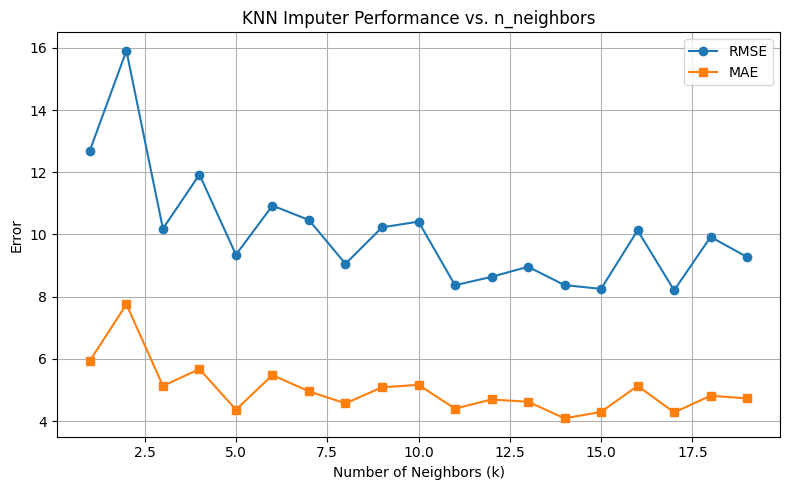

In [1090]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(results_df.index, results_df['RMSE'], marker='o', label='RMSE')
plt.plot(results_df.index, results_df['MAE'], marker='s', label='MAE')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error')
plt.title('KNN Imputer Performance vs. n_neighbors')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [1091]:
best_k = results_df['RMSE'].idxmin()
final_imputer = KNNImputer(n_neighbors=best_k)

# Apply imputation
df_imputed_array = final_imputer.fit_transform(df_cleaned[numeric_cols])

# Replace the numeric columns with the imputed data
df_cleaned[numeric_cols] = pd.DataFrame(df_imputed_array, columns=numeric_cols, index=df_cleaned.index)
df_cleaned.head()

/tmp/ipykernel_4871/3864694150.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numeric_cols] = pd.DataFrame(df_imputed_array, columns=numeric_cols, index=df_cleaned.index)


,Food Product,Moisture,Protein,Fat,Total Carbohydrates,Sugars,Dietary Fiber,Crude Fiber,Ash,FRAP_synthetic
0,"Sorghum, whole grain, white, raw",9.40,9.330000,5.195399,58.700000,9.704494,17.214000,4.256683,1.440000,1.280575
1,"Sorghum, whole grain, red, raw",10.10,6.650000,3.764022,64.180000,12.798612,14.024400,3.847746,1.520000,6.440420
2,"Quinoa, Blanca de juli, raw",11.39,12.369956,5.028301,66.590415,7.983335,12.157292,1.772200,2.995018,0.311746
3,"Quinoa, Kcancolla, raw",10.78,13.534674,3.259479,64.657734,7.983335,12.588942,2.739054,3.140544,4.198338
4,"Quinoa, La Molina 89, raw",12.03,13.608959,3.990149,60.558548,7.188247,14.066403,2.973386,4.803162,0.755735


In [1092]:
df_cleaned.shape

(868, 10)

In [1093]:
df_cleaned.to_csv(os.path.join(BASE_DIR, "data_preprocessed.csv"), index=False)

In [1094]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer

# Custom Transformer for dropping duplicates
class DropDuplicates(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop_duplicates()

# Custom Transformer for Outlier Cleaning
class OutlierCleaner(BaseEstimator, TransformerMixin):
    def __init__(self, z_thresh=3):
        self.z_thresh = z_thresh

    def fit(self, X, y=None):
        self.numeric_cols = X.select_dtypes(exclude='object').columns
        return self

    def transform(self, X):
        for col in self.numeric_cols:  # use self.numeric_cols
            col_mean = X[col].mean()
            col_std = X[col].std()
            z = (X[col] - col_mean) / col_std
            X.loc[np.abs(z) > self.z_thresh, col] = np.nan
        return X


# Custom Transformer for Row Filtering
class RowFilter(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=0.6):
        self.thresh = thresh

    def fit(self, X, y=None):
        self.numeric_cols = X.select_dtypes(exclude='object').columns
        return self

    def transform(self, X):
        threshold = len(self.numeric_cols) * self.thresh
        vals = X[self.numeric_cols].notna().sum(axis=1) >= threshold  # use self.numeric_cols
        return X[vals]


In [1095]:
# Define numeric columns ahead of time (you could also infer this inside a custom transformer)
numeric_cols = df.select_dtypes(exclude='object').columns
best_k = results_df['RMSE'].idxmin()

# Create pipeline
preprocessing_pipeline = make_pipeline(
    DropDuplicates(),
    OutlierCleaner(z_thresh=3),
    RowFilter(thresh=0.6),
    KNNImputer(n_neighbors=best_k)
)


In [1096]:
preprocessing_pipeline

,steps,"[('dropduplicates', ...), ('outliercleaner', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,z_thresh,3
,thresh,0.6
,missing_values,nan
,n_neighbors,np.int64(17)
,weights,'uniform'
,metric,'nan_euclidean'
,copy,True


In [1097]:
#df = pd.read_csv(os.path.join(BASE_DIR,"..","Combined_BioFood_fdc.csv"))
#df.drop(columns=['Side Stream'], inplace=True)

df_test = pd.DataFrame(preprocessing_pipeline.fit_transform(df.drop(columns=['Food Product'])),columns=df.drop(columns=['Food Product']).columns)

In [1098]:
df_test

,Moisture,Protein,Fat,Total Carbohydrates,Sugars,Dietary Fiber,Crude Fiber,Ash
0,9.40,9.330000,5.195399,58.700000,9.704494,17.214000,4.256683,1.440000
1,10.10,6.650000,3.764022,64.180000,12.798612,14.024400,3.847746,1.520000
2,11.39,12.369956,5.028301,66.590415,7.983335,12.157292,1.772200,2.995018
3,10.78,13.534674,3.259479,64.657734,7.983335,12.588942,2.739054,3.140544
4,12.03,13.608959,3.990149,60.558548,7.188247,14.066403,2.973386,4.803162
...,...,...,...,...,...,...,...,...
863,83.20,0.562500,0.572500,15.265000,10.698000,1.753000,1.326176,0.400000
864,80.79,0.687500,0.681300,17.396200,11.100000,1.289000,1.898767,0.445000
865,84.27,0.312500,0.371300,14.767400,7.798710,2.636000,1.326176,0.278800
866,84.94,0.578125,0.282500,13.455575,7.964000,1.346000,1.249894,0.743800


In [1100]:
df_test.to_csv(os.path.join(BASE_DIR, "data_preprocessed_pipeline.csv"), index=False)